In [2]:
import numpy as np
from scipy.integrate import solve_ivp, odeint
import matplotlib.pyplot as plt


<h2>Question</h2>

A dynamical system is given by

$$ \ddot{x} + k_1 x + k_3 x^3 = 0 $$

where the term $k_3x^3$ is to be treated as a perturbation to the standard oscillator problem.  Treat $e_1 = x_0$ and $e_2 = \dot{x}_0$ as invariants of the unperturbed system and derive the necessary differential equations of $e_1(t)$ and $e_2(t)$ such that the perturbed problem has the same algebraic solution $x(t)$ and $\dot{x}(t)$ as the unperturbed system.

Next, numerically integrate the differential equations $\dot{e}_1$ and $\dot{e}_2$. Enter below the states at 10s. Use $e_1(0) = 1$ and $e_2(0) = 0$ and the constants $k_1 = 3$ and $k_3 = 1$.

<h3>Reasoning</h3>

Schaub's text "Analytical Mechanics Of Space Systems" has a chapter (ch. 12) on perturbation methods which go over this exact variation of parameters case. In this perturbed scenario, $e_1$ and $e_2$ are now time varying, and we want to preserve the unperturbed form of the differential equations (not for any sacred reason, but for our own sake) and encode the differences between the perturbed and unperturbed problem entirely in $e_i(t)$.

Because we're taking $e_1$ and $e_2$ to be constants, the position and velocity of the perturbed and unperturbed problem must be identical (they are our osculating conditions), with only the acceleration express varying.

In [3]:
e1_0 = 1
e2_0 = 0
k1 = 3
k3 = 1

def e1_dot(t, y):
    e1 = y[0]
    e2 = y[1]
    x = e1*np.cos(np.sqrt(k1)*t) + e2*np.sin(np.sqrt(k1)*t)
    return ((k3*(x**3)*np.sin(np.sqrt(k1)*t)) / np.sqrt(k1), (-k3*(x**3)*np.sin(np.sqrt(k1)*t)) / np.sqrt(k1))

def e1_dot2(y, t):
    e1, e2 = y
    x = e1*np.cos(np.sqrt(k1)*t) + e2_0*np.sin(np.sqrt(k1)*t)
    return (- (k3*(x**3)*np.sin(np.sqrt(k1)*t)) / np.sqrt(k1), (k3*(x**3)*np.sin(np.sqrt(k1)*t)) / np.sqrt(k1))

def conds(t, y):
    e1, e2 = y
    x = e1_0*np.cos(np.sqrt(k1)*t) + e2_0*np.sin(np.sqrt(k1)*t)
    e1 = -e2 * np.tan(np.sqrt(k1)*t)
    e2 = (k3*(x**3)) / ((np.sqrt(k1)*np.tan((np.sqrt(k1)*t))*np.sin(np.sqrt(k1)*t) - np.cos(np.sqrt(k1)*t)))
    return (e1, e2)

initial = np.array([e1_0, e2_0])
t_0 = 0 # s
t_f = 10 # s
t_points = np.linspace(t_0, t_f, 100)

# test = odeint(conds, initial, t_points)
# print(test[:, 0][-1], test[:, 1][-1])

sol = solve_ivp(e1_dot, [t_0, t_f], initial, t_eval=t_points, method="DOP853")
print(sol)
print(sol.y[:, 1])

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 398
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True
        t: array([ 0.        ,  0.1010101 ,  0.2020202 ,  0.3030303 ,  0.4040404 ,
        0.50505051,  0.60606061,  0.70707071,  0.80808081,  0.90909091,
        1.01010101,  1.11111111,  1.21212121,  1.31313131,  1.41414141,
        1.51515152,  1.61616162,  1.71717172,  1.81818182,  1.91919192,
        2.02020202,  2.12121212,  2.22222222,  2.32323232,  2.42424242,
        2.52525253,  2.62626263,  2.72727273,  2.82828283,  2.92929293,
        3.03030303,  3.13131313,  3.23232323,  3.33333333,  3.43434343,
        3.53535354,  3.63636364,  3.73737374,  3.83838384,  3.93939394,
        4.04040404,  4.14141414,  4.24242424,  4.34343434,  4.44444444,
        4.54545455,  4.64646465,  4.74747475,  4.84848485,  4.94949495,
        5.05050505,  5.15151515,  5.25252525,  5.35353535,  5.45454545,
        5.55555556,  5.656565

In [352]:
def e1(t, y):
    e1 = y[0]
    e2 = y[1]
    # print(e1, e2)
    x = e1*np.cos(np.sqrt(k1)*t) + e2*np.sin(np.sqrt(k1)*t)
    return - (k3*(x**3)*np.sin(np.sqrt(k1)*t)) / np.sqrt(k1)

initial = np.array([e1_0, e2_0])
t_0 = 0 # s
t_f = 10 # s
t_points = np.linspace(t_0, t_f, 100)
new_sol = solve_ivp(e1, [t_0, t_f], initial, t_eval=t_points, method="DOP853")
print(new_sol.y.T[:, 0][-1], new_sol.y.T[:, 1][-1])

0.9685374586500187 -0.031462541349981304


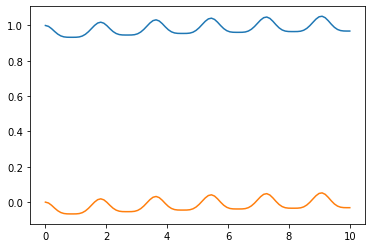

In [353]:

plt.plot(new_sol.t, new_sol.y.T)


In [354]:
[0.99505848 0.00494152]
0.9166613973913051 -0.0833386026086946
0.9685374586500187 -0.031462541349981304
[0.9908882  0.10274307]
[0.99939205 0.10364286]
[ 1.00886899 -0.10091069]
[ 1.00497318 -0.00497318]
[ 1.0050053 -0.0050053]
-0.5947808343942195 0.730043647910217
e1 at t=10: -0.6055559991072282 e1 at t=10: 0.7314181344751635
e1 at t=10: -0.5293198531905282 e1 at t=10: -0.8945415155819629
e1 at t=10: -0.5293198531904713 e1 at t=10: -0.8945415155819703
e1 at t=10: 1.073010071392865 e1 at t=10: -2.1440831492709416
 [ 1.08333307 -2.15984498]]
 [-0.59442675  0.73085803]]
e1 at t=10: 0.9186276297050021 e2 at t=10: 2.1368201249573673
e1 at t=10: -0.5189068164885718 e2 at t=10: -0.210613074565087


SyntaxError: invalid syntax (96490061.py, line 1)

In [ ]:
e1_0 = 1
e2_0 = 0
k1 = 3
k3 = 1

def f(t, y):
    # params
    e1, e2 = y

    # x(t)
    x = e1_0*np.cos(np.sqrt(k1)*t) + e2_0*np.sin(np.sqrt(k1)*t)
    g = -k3*x**3

    # de1/dt
    de1 = (np.sin(np.sqrt(k1)*t)*g) / np.sqrt(k1)

    # de2/dt
    de2 = -(np.cos(np.sqrt(k1)*t)*g) / np.sqrt(k1)
    return de1, de2

initial = np.array([e1_0, e2_0])
t_0 = 0 # s
t_f = 10 # s
t_points = np.linspace(t_0, t_f, 100)

sol = solve_ivp(f, [t_0, t_f], initial, t_eval=t_points)
print
e1_10 = sol.y.T[:, 0][-1]
e2_10 = sol.y.T[:, 1][-1]
print("e1 at t=10:", e1_10, "e1 at t=10:", e2_10)

e1 at t=10: 0.9186276297050635 e1 at t=10: 2.136820124957358


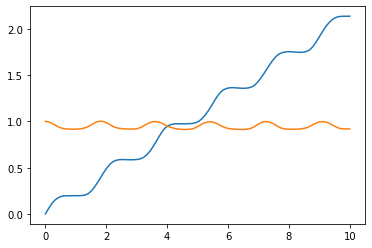

In [ ]:
plt.plot(sol.t, sol.y.T[:, 1])
plt.plot(sol.t, sol.y.T[:, 0])

In [ ]:
from scipy.integrate import odeint
from scipy.optimize import fsolve

e1_0 = 1
e2_0 = 0
k1 = 3
k3 = 1

initial = np.array([1, 0])
t_0 = 0 # s
t_f = 10 # s
t_points = np.linspace(t_0, t_f, 100)

def f(t, y):
    e1, e2 = y
    k = np.sqrt(k1)
    y1 = np.cos(k*t)
    y2 = np.sin(k*t)
    y1dot = -k*np.sin(k*t)
    y2dot = k*np.cos(k*t)

    x = e1_0*np.cos(np.sqrt(k1)*t) + e2_0*np.sin(np.sqrt(k1)*t)
    g = k3*x**3

    u1 = -((y2*g) / (y1*y2dot - y2*y1dot))
    u2 = ((y1*g) / (y1*y2dot -y2*y1dot))
    return (u1, u2)

sol = solve_ivp(f, [t_0, t_f], initial, t_eval=t_points)
e1_10 = sol.y.T[:, 0][-1]
e2_10 = sol.y.T[:, 1][-1]

print("e1 at t=10:", e1_10, "e2 at t=10:", e2_10)

e1 at t=10: 0.9186276297050021 e2 at t=10: 2.1368201249573673


In [ ]:
inhom = sol.y.T[:, 0][-1]*np.cos(np.sqrt(1)*10) + sol.y.T[:, 1][-1]*np.sin(np.sqrt(1)*10)
hom = 1*np.cos(np.sqrt(1)*10)
print(inhom, hom)

-1.9332695480585687 -0.8390715290764524


In [ ]:
from sympy import *
e1, e2, x = symbols('e1 e2 x', cls=Function)
k1, k3, t = symbols('k1 k3 t')

diffeq = Eq(x(t).diff(t, t) + 3*x(t), 0)
sol = dsolve(diffeq, x(t))
expr1 = exp(-t*sqrt(-k1))+exp(t*sqrt(-k1))
expr2 = cos(sqrt(k1)*t)+sin(sqrt(k1)*t)

print(expr1, expr2)
expr1.equals(expr2)
sol

exp(t*sqrt(-k1)) + exp(-t*sqrt(-k1)) sin(sqrt(k1)*t) + cos(sqrt(k1)*t)


Eq(x(t), C1*sin(sqrt(3)*t) + C2*cos(sqrt(3)*t))

In [ ]:
diff(sin(sqrt(3)*t)+cos(sqrt(3)*t), t)

-sqrt(3)*sin(sqrt(3)*t) + sqrt(3)*cos(sqrt(3)*t)

In [ ]:
expr3 = x(t).diff(t, t) + 3*x(t)
integrate(expr3, t)

Integral(k1*x(t) + Derivative(x(t), (t, 2)), t)

e1 at t=10: -0.5189068164885701 e2 at t=10: 0.2106130745650882


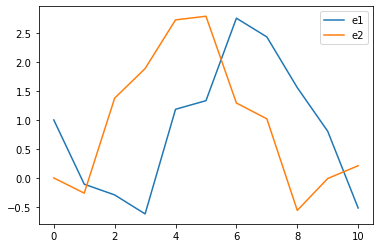

In [ ]:
e1_0 = 1
e2_0 = 0
k1 = 3
k3 = 1

initial = np.array([1, 0])
t_0 = 0 # s
t_f = 10 # s
t_points = np.linspace(t_0, t_f, 11)

def f(t, y):
    e1, e2 = y
    x = e1_0*np.cos(np.sqrt(k1)*t) + e2_0*np.sin(np.sqrt(k1)*t)
    e1dot = -(3*x**3)*np.cos(t)
    e2dot = -(3*x**3)*np.sin(t)
    return e1dot, e2dot

sol = solve_ivp(f, [t_0, t_f], initial, t_eval=t_points)
e1_10 = sol.y.T[:, 0][-1]
e2_10 = sol.y.T[:, 1][-1]

print("e1 at t=10:", e1_10, "e2 at t=10:", e2_10)

plt.plot(sol.t, sol.y[0], label="e1")
plt.plot(sol.t, sol.y[1], label="e2")
plt.legend()
# e1: -0.518906816488571 correct

e1 at t=10: 0.9490997201635947 e2 at t=10: 1.2439173513438595


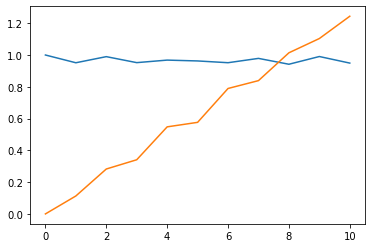

In [ ]:
e1_0 = 1
e2_0 = 0
k1 = 3
k3 = 1

initial = np.array([1, 0])
t_0 = 0 # s
t_f = 10 # s
t_points = np.linspace(t_0, t_f, 11)

def f(t, y):
    e1, e2 = y

    x = e1_0*np.cos(np.sqrt(k1)*t) + e2_0*np.sin(np.sqrt(k1)*t)
    # (cos(3^(1/2)*t)^2 + sin(3^(1/2)*t)^2)
    W = (np.sqrt(3) * np.cos(np.sqrt(3)*t))**2 + (np.sqrt(3) * np.sin(np.sqrt(3)*t))**2
    e1dot = - ((np.sin(np.sqrt(3)*t)) * (x**3)) / W
    e2dot = ((np.cos(np.sqrt(3)*t)) * (x**3)) / W
    return e1dot, e2dot

sol = solve_ivp(f, [t_0, t_f], initial, t_eval=t_points)
e1_10 = sol.y.T[:, 0][-1]
e2_10 = sol.y.T[:, 1][-1]

print("e1 at t=10:", e1_10, "e2 at t=10:", e2_10)

plt.plot(t_points, sol.y.T[:, 0])
plt.plot(t_points, sol.y.T[:, 1])
# e1: -0.518906816488571 correct

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 50
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True
        t: array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])
 t_events: None
        y: array([[ 1.        ,  1.84145005,  1.90643749,  1.14546442,  0.24270607,
         0.04013314,  0.72104291,  1.66191077,  1.98750496,  1.41168331,
         0.45618335],
       [ 0.        ,  0.84145005,  0.90643749,  0.14546442, -0.75729393,
        -0.95986686, -0.27895709,  0.66191077,  0.98750496,  0.41168331,
        -0.54381665]])
 y_events: None
e1 at t=10: 0.4561833512157285


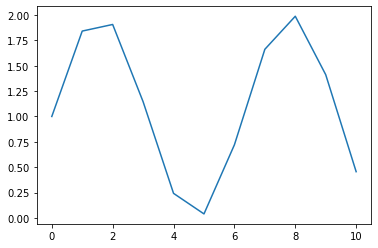

In [ ]:
e1_0 = 1
e2_0 = 0
k1 = 3
k3 = 1

initial = np.array([1, 0])
t_0 = 0 # s
t_f = 10 # s
t_points = np.linspace(t_0, t_f, 11)

def f(t, y):
    e1, e2 = y
    # x = e1_0*np.cos(np.sqrt(k1)*t) + e2_0*np.sin(np.sqrt(k1)*t)
    e1dot = np.cos(t)
    return e1dot

sol = solve_ivp(f, [t_0, t_f], initial, t_eval=t_points)
print(sol)
e1_10 = sol.y.T[:, 0][-1]

print("e1 at t=10:", e1_10)

plt.plot(t_points, sol.y.T[:, 0])
# e1: -0.518906816488571 correct

In [ ]:
e1_0 = 1
e2_0 = 0
k1 = 3
k3 = 1

def de1(t, y):
    x = e1_0*np.cos(np.sqrt(k1)*t) + e2_0*np.sin(np.sqrt(k1)*t)
    e1 = (np.sin(np.sqrt(3)*y)/np.sqrt(3))*x**3
    e2 = -(np.cos(np.sqrt(3)*t)/np.sqrt(3))*x**3
    return e1, e2
initial = np.array([1, 0])

sol = solve_ivp(de1, [t_0, t_f], initial, t_eval=t_points)
# plt.plot(sol1.t, sol1.y[0])
# print(sol1.y[0][-1])

# def de2(t, y):
#     x = np.cos(np.sqrt(3)*t)
#     return -(3*x**3)*np.cos(t)

# sol = solve_ivp(de2, (0, 10), [1])
# plt.plot(sol.t, sol.y[0])
# print(sol.y[0][-1])

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (2,) + inhomogeneous part.

In [ ]:
def V(r):
    return 4/3*np.pi*r**3

Earth_r = 3958.8 # miles
Sun_r = 432690 # miles

Earth_V = V(Earth_r) # mi^3
Sun_V = V(Sun_r) # mi^3

print("Earth Volume", Earth_V, "\nSun Volume", Sun_V, "\nVolume ratio", Sun_V/Earth_V)
print("\nEarth Radius", Earth_r, "\nSun Radius", Sun_r, "\nRadii ratio", Sun_r/Earth_r)


Earth Volume 259883851296.82016 
Sun Volume 3.393275988809431e+17 
Volume ratio 1305689.4346751394

Earth Radius 3958.8 
Sun Radius 432690 
Radii ratio 109.29827220369809


In [ ]:
from sympy import *
from sympy.abc import x, y, z
a = symbols('a')
equations = [x*cos(sqrt(3)*z)+y*sin(sqrt(3)*z), x*(-sqrt(3)*sin(sqrt(3)*z)) + y*sqrt(3)*cos(sqrt(3)*z)-1]
solutions = solve(equations, x, y, dict=True)
solutions

[{x: -sqrt(3)*sin(sqrt(3)*z)/(3*sin(sqrt(3)*z)**2 + 3*cos(sqrt(3)*z)**2),
  y: sqrt(3)*cos(sqrt(3)*z)/(3*sin(sqrt(3)*z)**2 + 3*cos(sqrt(3)*z)**2)}]

In [ ]:
e1_0 = 1
e2_0 = 0
k1 = 3
k3 = 1

initial = np.array([1, 0])
t_0 = 0 # s
t_f = 10 # s
t_points = np.linspace(t_0, t_f, 11)

def f(t, y):
    # e1, e2 = y
    x = -(y[0]*np.cos(np.sqrt(k1)*t) + y[1]*np.sin(np.sqrt(k1)*t))**3
    e1dot = -np.sqrt(3)*x*np.sin(np.sqrt(3)*t)/(3*np.sin(np.sqrt(3)*t)**2 + 3*cos(np.sqrt(3)*t)**2)
    e2dot = np.sqrt(3)*x*np.cos(np.sqrt(3)*t)/(3*np.sin(np.sqrt(3)*t)**2 + 3*np.cos(np.sqrt(3)*t)**2)
    return e1dot, e2dot

sol = solve_ivp(f, [t_0, t_f], initial, t_eval=t_points)
e1_10 = sol.y.T[:, 0][-1]
e2_10 = sol.y.T[:, 1][-1]
print(e1_10, e2_10)
# -0.5293198531904945 -0.8945415155819677
# e1 correct: -0.518906816488571

-0.5773769335190285 -1.1085847936050701


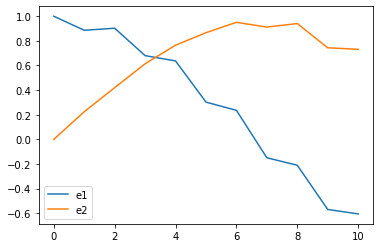

In [ ]:
plt.plot(sol.t, sol.y[0], label="e1")
plt.plot(sol.t, sol.y[1], label="e2")
plt.legend()

In [ ]:
e1_0 = 1
e2_0 = 0
k1 = 3
k3 = 1

initial = np.array([1, 0])
t_0 = 0 # s
t_f = 10 # s
t_points = np.linspace(t_0, t_f, 11)

def f(t, y):
    x = -(y[0]*np.cos(np.sqrt(k1)*t) + y[1]*np.sin(np.sqrt(k1)*t))**3
    e1dot = -(np.sin(np.sqrt(3)*t)/np.sqrt(3))*x
    e2dot = (np.cos(np.sqrt(3)*t)/np.sqrt(3))*x
    return e1dot, e2dot
rtol, atol = (1e-8, 1e-8)
sol2 = solve_ivp(f, [t_0, t_f], initial, t_eval=t_points, atol=1e-20, rtol=1e-6)
e1_10 = sol2.y.T[:, 0][-1]
e2_10 = sol2.y.T[:, 1][-1]
print(e1_10, e2_10)
# -0.5293198531904945 -0.8945415155819677
# -0.5215526442941181 -0.8936809312830646
# e1 correct: -0.518906816488571

-0.5215526517858247 -0.8936809477888705


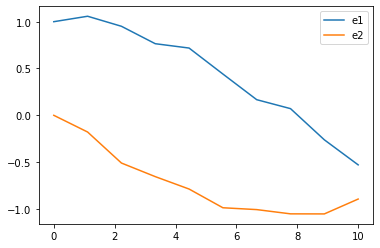

In [ ]:
plt.plot(sol.t, sol.y[0], label="e1")
plt.plot(sol.t, sol.y[1], label="e2")
plt.legend()

In [180]:
# SOLUTION QUIZ 1 QUESTION 4

from scipy.integrate import odeint
import math

# constants
e1_0 = 1
e2_0 = 0
k1 = 3
k3 = 1

# config 
initial = np.array([1, 0])
t_0 = 0 # s
t_f = 10 # s
t_points = np.linspace(t_0, t_f, 10)

# system of ODEs
def f(y, t):
    e1, e2 = y
    sq_k1 = math.sqrt(k1)
    x = -(e1*math.cos(sq_k1*t) + e2*math.sin(sq_k1*t))**3
    e1dot = -(math.sin(sq_k1*t)/math.sqrt(3))*x
    e2dot = (math.cos(sq_k1*t)/math.sqrt(3))*x
    return [e1dot, e2dot]

# solution
sol = odeint(f, initial, t_points, rtol=1e-5)
print("e1", sol[:, 0][-1], "e2", sol[:, 1][-1])
e1 = sol[:, 0]
e2 = sol[:, 1]
# e1 correct: -0.518906816488571 or 0.5215556210526402 (varies with tolerance and scheme)
# 

e1 -0.521596082859148 e2 -0.8936749996147972


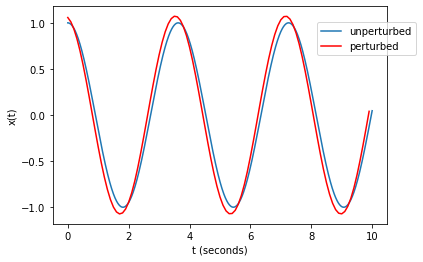

In [ ]:
# homogenous solution
def f_h(t, X):
    x, dx = X
    ddx = -3*x
    return [dx, ddx]

initial = np.array([1, 0])
t_0 = 0 # s
t_f = 10 # s
t_points = np.linspace(t_0, t_f, 1000)
sol2 = solve_ivp(f_h, [t_0, t_f], initial, t_eval=t_points)
# print(sol2)
plt.plot(sol2.t, sol2.y[0], label="unperturbed")

# perturbed solution
def f_p(t, iter=[0]):
    iter[0]+=1
    sq_k1 = math.sqrt(k1)
    return e1[iter[0]]*np.cos(sq_k1 * t ) + e2[iter[0]]*np.sin(sq_k1 * t)

t1 = np.arange(0.0, 10.0, .1)
plt.plot(t1, f_p(t1), "red", label="perturbed")
plt.xlabel("t (seconds)")
plt.ylabel("x(t)")
plt.legend()
plt.legend(bbox_to_anchor=(1.1, .95))

In [177]:
# QUIZ 2 
import math
init = [1, 0]
g = 9.81
sq3 = math.sqrt(3)
t_0 = 0 # s
t_f = 10 # s
t_points = np.linspace(t_0, t_f, 1000)

def f(t, y):
    e1, e2 = y
    print(e1, e2)
    L12 = sq3
    # print(L12)
    dote1 = -1/L12*(-g*np.cos(sq3*t))
    dote2 = 1/L12*(-g*np.sin(sq3*t))
    return dote1, dote2

sol = solve_ivp(f, [t_0, t_f], init, t_eval=t_points, method="DOP853", rtol=1e-5)
e1_10 = sol.y.T[:, 0][-1]
e2_10 = sol.y.T[:, 1][-1]
print(e1_10, e2_10)
# -2.267286372377012 -3.133489827181195
# -2.267151700933397 -3.1335222907161104


1.0 0.0
1.01 0.0
1.0233857451041404 0.0
1.0350779448673293 -0.0001881496831100722
1.0526156558339386 -0.0004233322762162455
1.1251893228194807 -0.0023973534645582387
1.1481474832326115 -0.0033576376936491916
1.1111272561961247 -0.0018888126422370343
1.136758449115089 -0.002861018169220364
1.2891782492060715 -0.012811650922678731
1.266461007390256 -0.010874575531165963
1.3802191049021968 -0.022180203635924874
1.4432261312132868 -0.03017738091525636
1.4432261311765588 -0.03017738191698834
1.0444580932596168 -0.00030223446512335863
1.0889079683128566 -0.001208881991618976
1.3451516991840737 -0.018266569266316767
1.6612085138250632 -0.05999860965541054
1.7673893092358213 -0.09132049543250866
1.9267445574080047 -0.1340802448545442
2.5566946246643747 -0.395075635639259
2.7434484647192434 -0.5035421221635018
2.4392240067399156 -0.33375476515089675
2.651792564383424 -0.4478584173387533
3.6956450268555088 -1.4187527143919176
3.568492653560389 -1.2460685997266345
4.084375339808036 -2.18455025557

In [137]:
# from sympy import Function, dsolve, Derivative, checkodesol, diff, Matrix, Symbol
import sympy as sp

t, C1 = sp.symbols('t C_1')
y = sp.Function('y')

# solve unperturbed diff eq
diffeq = sp.Eq(y(t).diff(t, t), -3*y(t))
r = sp.dsolve(diffeq)
r

Eq(y(t), C1*sin(sqrt(3)*t) + C2*cos(sqrt(3)*t))

In [136]:
# integrate to get velocity

# v = sp.Integral(r, t)
v = sp.integrate(r, t)
v

c:\ProgramData\Anaconda3\lib\site-packages\sympy\integrals\integrals.py:1563: SymPyDeprecationWarning: 

Creating a indefinite integral with an Eq() argument is
deprecated.

This is because indefinite integrals do not preserve equality
due to the arbitrary constants. If you want an equality of
indefinite integrals, use Eq(Integral(a, x), Integral(b, x))
explicitly.

See https://docs.sympy.org/latest/explanation/active-deprecations.html#deprecated-indefinite-integral-eq
for details.

This has been deprecated since SymPy version 1.6. It
will be removed in a future version of SymPy.

  integral = Integral(*args, **kwargs)


Eq(Integral(y(t), t), -sqrt(3)*C1*cos(sqrt(3)*t)/3 + sqrt(3)*C2*sin(sqrt(3)*t)/3)

In [138]:
t = sp.symbols('t')
# y = sp.Function('y')
# y = 
e1 = sp.symbols('e1')
e2 = sp.symbols('e2')

y = r.subs([('C1', e1), ('C2', e2)])
v = v.subs([('C1', e1), ('C2', e2)])
# compute partial derivatives
dyde1 = sp.diff(y, e1)
dyde2 = sp.diff(y, 'C2')
dvde1 = sp.diff(v, 'C1')
dvde2 = sp.diff(v, 'C2')

# compute matrix terms

# L12 = dyde1*dvde2 - dvde1*dyde2

# construct matrix 

# L = Matrix([[0, L12], [-L12, 0]])
# print(L) # check matrix

# invert matrix 
dyde1

Derivative(Eq(y(t), e1*sin(sqrt(3)*t) + e2*cos(sqrt(3)*t)), e1)

In [110]:
dyde1 = sp.sin(sp.sqrt(3)*t)
dyde2 = sp.cos(sp.sqrt(3)*t)
dve1 = -(sp.sqrt(3) * sp.cos(sp.sqrt(3)*t))/3
dve2 = (sp.sqrt(3) * sp.sin(sp.sqrt(3)*t))/3


e1e2 = dyde1*dve2 - dvde1*dyde2
L = sp.Matrix([[0, e1e2], [-e1e2, 0]])
L_inv = L.inv()
L_inv

Matrix([
[                        0, -sqrt(3)/sin(sqrt(3)*t)**2],
[sqrt(3)/sin(sqrt(3)*t)**2,                          0]])

In [120]:
g = sp.symbols('g')
e1 = sp.symbols('e1')
e2 = sp.symbols('e2')
R = -g*(e1*sp.sin(sp.sqrt(3)*t) + e2*sp.cos(sp.sqrt(3)*t))
sp.diff(R, e2)

-g*cos(sqrt(3)*t)